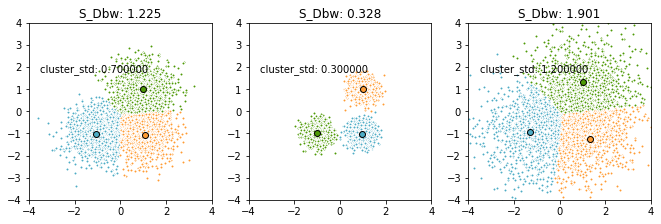

In [74]:
import numpy as np
import S_Dbw as sdbw
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics.pairwise import pairwise_distances_argmin

np.random.seed(0)

S_Dbw_result = []
batch_size = 45
centers = [[1, 1], [-1, -1], [1, -1]]
cluster_std=[0.7,0.3,1.2]
n_clusters = len(centers)
X1, _ = make_blobs(n_samples=3000, centers=centers, cluster_std=cluster_std[0])
X2, _ = make_blobs(n_samples=3000, centers=centers, cluster_std=cluster_std[1])
X3, _ = make_blobs(n_samples=3000, centers=centers, cluster_std=cluster_std[2])

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.08, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

for item, X in enumerate(list([X1, X2, X3])):
    k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
    k_means.fit(X)

    k_means_cluster_centers = k_means.cluster_centers_
    k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

    KS = sdbw.S_Dbw(X, k_means_labels, k_means_cluster_centers)
    S_Dbw_result.append(KS.S_Dbw_result())
    
    ax = fig.add_subplot(1,3,item+1)
    for k, col in zip(range(n_clusters), colors):
        my_members = k_means_labels == k
        cluster_center = k_means_cluster_centers[k]
        ax.plot(X[my_members, 0], X[my_members, 1], 'w',
                markerfacecolor=col, marker='.')
        ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
                markeredgecolor='k', markersize=6)
    ax.set_title('S_Dbw: %.3f' %(S_Dbw_result[item]))
    ax.set_ylim((-4,4))
    ax.set_xlim((-4,4))
    plt.text(-3.5, 1.8, 'cluster_std: %f' %(cluster_std[item]))
plt.savefig('./pic1.png', dpi=150)

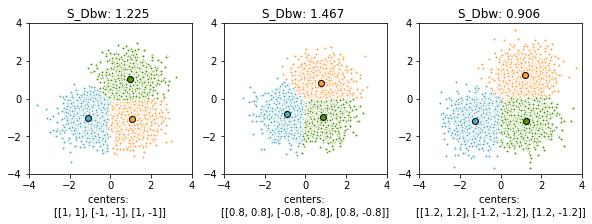

In [73]:
np.random.seed(0)

S_Dbw_result = []
batch_size = 45
centers = [[[1, 1], [-1, -1], [1, -1]],
            [[0.8, 0.8], [-0.8, -0.8], [0.8, -0.8]],
            [[1.2, 1.2], [-1.2, -1.2], [1.2, -1.2]]]
n_clusters = len(centers)
X1, _ = make_blobs(n_samples=3000, centers=centers[0], cluster_std=0.7)
X2, _ = make_blobs(n_samples=3000, centers=centers[1], cluster_std=0.7)
X3, _ = make_blobs(n_samples=3000, centers=centers[2], cluster_std=0.7)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.2, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

for item, X in enumerate(list([X1, X2, X3])):
    k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
    k_means.fit(X)

    k_means_cluster_centers = k_means.cluster_centers_
    k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

    KS = sdbw.S_Dbw(X, k_means_labels, k_means_cluster_centers)
    S_Dbw_result.append(KS.S_Dbw_result())
    
    ax = fig.add_subplot(1,3,item+1)
    for k, col in zip(range(n_clusters), colors):
        my_members = k_means_labels == k
        cluster_center = k_means_cluster_centers[k]
        ax.plot(X[my_members, 0], X[my_members, 1], 'w',
                markerfacecolor=col, marker='.')
        ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
                markeredgecolor='k', markersize=6)
    ax.set_title('S_Dbw: %.3f ' %(S_Dbw_result[item]))
#     ax.set_xticks(())
#     ax.set_yticks(())
    ax.set_ylim((-4,4))
    ax.set_xlim((-4,4))
    ax.set_xlabel('centers: \n%s' %(centers[item]))
plt.savefig('./pic2.png', dpi=150)